In [1]:
import json
import pandas as pd
import numpy as np 
import pandas as pd
from retry_requests import retry
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/merged_df_final.csv')
cols_to_keep = ['Deal ID', 'sysid', 'postalCode', 'PLZ', 'QC Confirmation Date', 'Kaltanlage Hit', 'Service Hit', 'Auftrittsdatum']
col_names_1 = ['deal_id', 'heatpumpid', 'postalcode', 'PLZ', 'installation_date', 'kaltanlage_hit', 'service_hit', 'auftrittsdatum']

In [3]:
df_new = df[cols_to_keep]
df_new.columns = col_names_1
df_new['deal_id'] = df_new['deal_id'].astype(str)
df_new['PLZ'] = df_new['PLZ'].astype('Int64')
#cols_dates = df_new.columns[['qc_confirmation_date', 'auftrittsdatum']]
df_new[['installation_date', 'auftrittsdatum']] = df_new[['installation_date', 'auftrittsdatum']].apply(pd.to_datetime, format='%m/%d/%y')
df_new.head(20)

/var/folders/ll/47yb30jx7vz82_ynpx7ktyyr0000gn/T/ipykernel_42698/1210908680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['deal_id'] = df_new['deal_id'].astype(str)
/var/folders/ll/47yb30jx7vz82_ynpx7ktyyr0000gn/T/ipykernel_42698/1210908680.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['PLZ'] = df_new['PLZ'].astype('Int64')
/var/folders/ll/47yb30jx7vz82_ynpx7ktyyr0000gn/T/ipykernel_42698/1210908680.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,deal_id,heatpumpid,postalcode,PLZ,installation_date,kaltanlage_hit,service_hit,auftrittsdatum
0,72973,101477868,52525,52525,2023-12-12,0.0,0.0,NaT
1,73300,101477908,91077,91077,2023-11-27,0.0,0.0,NaT
2,73396,101477950,17375,17375,2023-10-27,0.0,0.0,NaT
3,72936,101477970,97440,97440,2023-12-22,0.0,1.0,NaT
4,73357,101477971,96117,96117,2023-11-10,0.0,1.0,NaT
5,73993,101477982,52457,52457,2023-11-10,0.0,1.0,NaT
6,73577,101478040,22399,22399,2024-01-13,0.0,1.0,NaT
7,73984,101478043,52477,52477,2023-11-29,1.0,1.0,2023-11-15
8,74091,101478046,73434,73434,2023-12-20,1.0,1.0,2023-12-15
9,74088,101478050,12309,12309,2023-11-04,0.0,0.0,NaT


In [4]:
df_new = df_new.dropna(subset='auftrittsdatum')

In [5]:
df_new.sort_values('heatpumpid', ascending=True)

,deal_id,heatpumpid,postalcode,PLZ,installation_date,kaltanlage_hit,service_hit,auftrittsdatum
7,73984,101478043,52477,52477,2023-11-29,1.0,1.0,2023-11-15
8,74091,101478046,73434,73434,2023-12-20,1.0,1.0,2023-12-15
13,73485,101478063,76228,76228,2024-01-13,1.0,1.0,2024-02-26
19,72920,101478147,65205,65205,2023-12-21,1.0,1.0,2023-12-10
20,72920,101478147,65205,65205,2023-12-21,1.0,1.0,2023-12-24
...,...,...,...,...,...,...,...,...
1968,97646,101868771,74858,74858,2024-07-03,1.0,1.0,2024-09-13
1970,45610,101868774,38170,38170,2024-07-11,1.0,1.0,2024-09-16
1975,87077,101868793,88326,88326,2024-07-12,1.0,1.0,2024-09-17
1980,77042,101869262,21079,21079,2024-07-10,1.0,1.0,2024-08-17


In [6]:
# Read sheet Kaltanlagen Datum from enpal_cm_20240925 excel, clean and save as df
df_kadatum = pd.read_excel(io='data/ENPAL_CRM_20240925.xlsx',sheet_name='Kaltanlagen Datum')
df_kadatum['Auftrittsdatum'] = pd.to_datetime(df_kadatum['Auftrittsdatum'], format='%d.%m.%Y')
df_kadatum = df_kadatum.drop('Problemtyp', axis=1)
df_kadatum.columns = df_kadatum.columns.map(lambda x: x.lower().replace(' ', '_'))
df_kadatum.drop_duplicates(inplace=True)
df_kadatum

,deal_id,auftrittsdatum
0,104504,2024-09-13
1,56269,2024-03-01
2,81691,2024-07-31
3,73738,2023-10-19
4,73193,2023-10-13
...,...,...
1171,118711,2024-09-12
1172,73379,2023-10-27
1173,115525,2024-07-31
1175,115525,2024-08-21


In [7]:
df_enpalcrm = pd.read_excel(io='data/ENPAL_CRM_20240925.xlsx',sheet_name='ENPAL CRM')
df_enpalcrm.columns = df_enpalcrm.columns.map(lambda x: x.lower().replace(' ', '_')) # same as df.columns.str.lower() and df.columns.str.replace(' ', '_')
df_enpalcrm.drop_duplicates(inplace=True)
df_enpalcrm

,deal_id,installation_partner,plz,qc_confirmation_date,kaltanlage_hit,service_hit
0,56269,Robin MT 1,NaN,2024-02-14,1,1
1,74095,NaN,NaN,2024-02-29,0,0
2,103018,ICP Cieplo Standard MT 1,1156.0,2024-07-10,0,0
3,73738,R&R MT 1,1219.0,2023-08-24,1,1
4,100159,ICP AP Instal MT 1,1219.0,2024-08-10,0,1
...,...,...,...,...,...,...
3583,154361,NaN,96317.0,2024-09-06,0,0
3584,145014,HP WePa GmbH MT1,64291.0,2024-09-19,0,0
3585,62260,NaN,55116.0,2024-09-18,0,0
3586,142078,NaN,10437.0,2024-09-15,0,0


In [8]:
# Merge both sheets
df_enpalcrm_kadatum = df_kadatum.merge(df_enpalcrm, how='left', on='deal_id')
df_enpalcrm_kadatum['plz'] = df_enpalcrm_kadatum['plz'].fillna(-1)
df_enpalcrm_kadatum['plz'] = df_enpalcrm_kadatum['plz'].astype(int)
df_enpalcrm_kadatum['plz'] = df_enpalcrm_kadatum['plz'].astype(str)
df_enpalcrm_kadatum['plz'] = df_enpalcrm_kadatum['plz'].replace('-1', np.nan)
df_enpalcrm_kadatum.drop_duplicates(subset=['deal_id'], inplace=True)
df_enpalcrm_kadatum

,deal_id,auftrittsdatum,installation_partner,plz,qc_confirmation_date,kaltanlage_hit,service_hit
0,104504,2024-09-13,NaN,NaN,NaT,NaN,NaN
1,56269,2024-03-01,Robin MT 1,NaN,2024-02-14,1.0,1.0
2,81691,2024-07-31,NaN,NaN,NaT,NaN,NaN
3,73738,2023-10-19,R&R MT 1,1219,2023-08-24,1.0,1.0
4,73193,2023-10-13,Windsor MT 2 SHK,1734,2023-06-07,1.0,1.0
...,...,...,...,...,...,...,...
1054,65249,2024-03-28,Heiztec24 MT 1,98631,2024-03-28,1.0,1.0
1055,73316,2023-09-29,NaN,99192,2023-06-30,1.0,1.0
1061,118711,2024-09-11,Heiztec24 MT 1,99428,2024-08-14,1.0,1.0
1063,73379,2023-10-27,Climatec MT 1 (alt),99441,2023-11-03,1.0,1.0


In [9]:
df_enpalcrm_kadatum.drop(columns='installation_partner', inplace=True)
#df_enpalcrm_kadatum
print(df_enpalcrm_kadatum.columns)
display(df_enpalcrm_kadatum.head())

Index(['deal_id', 'auftrittsdatum', 'plz', 'qc_confirmation_date',
       'kaltanlage_hit', 'service_hit'],
      dtype='object')


,deal_id,auftrittsdatum,plz,qc_confirmation_date,kaltanlage_hit,service_hit
0,104504,2024-09-13,NaN,NaT,NaN,NaN
1,56269,2024-03-01,NaN,2024-02-14,1.0,1.0
2,81691,2024-07-31,NaN,NaT,NaN,NaN
3,73738,2023-10-19,1219,2023-08-24,1.0,1.0
4,73193,2023-10-13,1734,2023-06-07,1.0,1.0


In [10]:
df_deal_sysid = pd.read_excel(io='data/kaltanlagen_check_df_v3_copy.xlsx',sheet_name='bosch_complete_20240814')
df_deal_sysid.columns = df_deal_sysid.columns.map(lambda x: x.lower().replace(' ', '_'))
print(df_deal_sysid.columns)
display(df_deal_sysid.head())


Index(['deal_id', 'sysid', 'insight4wayvalvecyclingcheck',
       'insightcompressormodulationcheck', 'insightcompressorcheck',
       'insightcompressorshortcyclecheck7', 'insightcompressorstartcheck25',
       'insightcompressorstartcheck15', 'insightdefrostmode',
       'insightdefrostcheck', 'insighteheatercyclecheck',
       'insighteheaterenergycheck30', 'insighteheaterenergycheck7',
       'insighteheaterfullpowerruntimecheck7', 'insighteheaterruntimecheckdhw',
       'insighteheaterruntimecheck', 'insighteheaterstartcheck7',
       'insightcopcheck30', 'insightcopcheck7', 'insightpc0pumpcyclingcheck',
       'insightpc0pumpcheck', 'insightwaterpressurecheck7', 'op_days',
       'postalcode', 'name', 'unnamed:_4', 'unnamed:_26', 'unnamed:_27',
       'unnamed:_28', 'unnamed:_29'],
      dtype='object')


,deal_id,sysid,insight4wayvalvecyclingcheck,insightcompressormodulationcheck,insightcompressorcheck,insightcompressorshortcyclecheck7,insightcompressorstartcheck25,insightcompressorstartcheck15,insightdefrostmode,insightdefrostcheck,...,insightpc0pumpcheck,insightwaterpressurecheck7,op_days,postalcode,name,unnamed:_4,unnamed:_26,unnamed:_27,unnamed:_28,unnamed:_29
0,72973,101477868,0.0,0.000000,0.341772,0.341772,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,237,52525,Thorsten Neumann,NaN,NaN,NaN,NaN,NaN
1,73300,101477908,0.0,0.000000,0.677419,0.669355,0.000000,0.221774,0.000000,0.000000,...,0.0,0.012097,248,91077,Alexander Schmidt,NaN,NaN,NaN,NaN,NaN
2,73396,101477950,0.0,0.000000,0.728261,0.652174,0.007246,0.340580,0.000000,0.000000,...,0.0,0.000000,276,17375,Dietmar Kramm,NaN,NaN,NaN,NaN,NaN
3,72936,101477970,0.0,0.409091,0.000000,0.000000,0.000000,0.000000,0.295455,0.795455,...,0.0,0.000000,44,97440,Matthias Seufert,NaN,NaN,NaN,NaN,NaN
4,73357,101477971,0.0,0.000000,0.496241,0.496241,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,266,96117,Christa Moroskow,NaN,NaN,NaN,NaN,NaN


In [11]:
df_enpalcrm_kadatum_merged = df_enpalcrm_kadatum.merge(df_deal_sysid, how='left', on='deal_id')
df_enpalcrm_kadatum_merged.sample(50)
df_enpalcrm_kadatum_merged.rename(columns={'sysid':'heatpumpid', 'qc_confirmation_date': 'installation_date'}, inplace=True)

# Code to extract sysid rows with null values and save as CSV
# df_sysid_null = df_enpalcrm_kadatum_merged[df_enpalcrm_kadatum_merged['sysid'].isnull()]
# df_sysid_null.sort_values(by='auftrittsdatum', ascending=True, inplace=True)
# df_sysid_null.to_csv('data/missing_sysid.csv')
# df_sysid_null.sample(20)

In [12]:
df_enpalcrm_kadatum_merged['heatpumpid'] = df_enpalcrm_kadatum_merged['heatpumpid'].astype('Int64')
df_enpalcrm_kadatum_merged.head(20)


,deal_id,auftrittsdatum,plz,installation_date,kaltanlage_hit,service_hit,heatpumpid,insight4wayvalvecyclingcheck,insightcompressormodulationcheck,insightcompressorcheck,...,insightpc0pumpcheck,insightwaterpressurecheck7,op_days,postalcode,name,unnamed:_4,unnamed:_26,unnamed:_27,unnamed:_28,unnamed:_29
0,104504,2024-09-13,NaN,NaT,NaN,NaN,<NA>,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,56269,2024-03-01,NaN,2024-02-14,1.0,1.0,101590897,0.0,0.000000,0.705426,...,0.0,0.000000,129.0,7629,Christoph Ludwig,NaN,NaN,NaN,NaN,NaN
2,81691,2024-07-31,NaN,NaT,NaN,NaN,101764450,0.0,0.000000,0.230769,...,0.0,0.000000,182.0,52393,Ulrike Adorf,NaN,NaN,NaN,NaN,NaN
3,73738,2023-10-19,1219,2023-08-24,1.0,1.0,101535489,0.0,0.000000,0.255319,...,0.0,0.000000,282.0,1219,Karl Schumacher,NaN,NaN,NaN,NaN,NaN
4,73193,2023-10-13,1734,2023-06-07,1.0,1.0,<NA>,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,119627,2024-09-20,1920,2024-07-26,1.0,1.0,<NA>,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,14591,2024-04-16,1936,2024-02-27,1.0,1.0,101742779,0.0,0.000000,0.922535,...,0.0,0.000000,142.0,1936,Torsten Schleinitz,NaN,NaN,NaN,NaN,NaN
7,56355,2024-04-26,2736,2024-04-25,1.0,1.0,101846212,0.0,0.000000,0.285714,...,0.0,0.000000,98.0,2736,Wolfgang Lein,NaN,NaN,NaN,NaN,NaN
8,73767,2023-12-11,3055,2023-06-29,1.0,1.0,101512133,0.0,0.641667,0.020833,...,0.0,0.000000,240.0,3055,Jenny Lorbeer,NaN,NaN,NaN,NaN,NaN
9,73406,2024-04-19,4207,2023-05-04,1.0,1.0,101670009,0.0,0.353125,0.378125,...,0.0,0.000000,320.0,4207,Arne Scheer,NaN,NaN,NaN,NaN,NaN


In [13]:
# Specify columns to keep and re-order columns
col_to_keep = ['deal_id', 'heatpumpid', 'plz', 'postalcode', 'op_days', 'installation_date', 'kaltanlage_hit', 'service_hit', 'auftrittsdatum']
df_enpalcrm_kadatum_merged = df_enpalcrm_kadatum_merged[col_to_keep]
df_enpalcrm_kadatum_merged

,deal_id,heatpumpid,plz,postalcode,op_days,installation_date,kaltanlage_hit,service_hit,auftrittsdatum
0,104504,<NA>,NaN,NaN,NaN,NaT,NaN,NaN,2024-09-13
1,56269,101590897,NaN,7629,129.0,2024-02-14,1.0,1.0,2024-03-01
2,81691,101764450,NaN,52393,182.0,NaT,NaN,NaN,2024-07-31
3,73738,101535489,1219,1219,282.0,2023-08-24,1.0,1.0,2023-10-19
4,73193,<NA>,1734,NaN,NaN,2023-06-07,1.0,1.0,2023-10-13
...,...,...,...,...,...,...,...,...,...
795,65249,101823229,98631,98631,126.0,2024-03-28,1.0,1.0,2024-03-28
796,73316,<NA>,99192,NaN,NaN,2023-06-30,1.0,1.0,2023-09-29
797,118711,<NA>,99428,NaN,NaN,2024-08-14,1.0,1.0,2024-09-11
798,73379,101532530,99441,99441,10.0,2023-11-03,1.0,1.0,2023-10-27


In [14]:
bosch_wide_clean = pd.read_csv('data/bosch_wide_clean.csv')
bosch_wide_clean

,heatpumpid,op_days,date,month,EheaterRuntimeDhwWeekly,EheaterEnergyWeekly,EheaterStartWeekly,EheaterCycleWeekly,HeatpumpCopWeekly,HeatpumpCopMonthly,...,CompressorPerformanceWeekly,CompressorShortCycleWeekly,CompressorStartsDaily,CompressorStartsWeekly,DefrostModeWeekly,DefrostWeekly,Pc0PumpWeekly,4WayValveCycleWeekly,prio1_count,prio2_count
0,101477868,237,2023-12-14,2023-12,False,False,False,False,False,NaN,...,False,False,False,False,False,False,False,False,0,0
1,101477868,237,2024-05-08,2024-05,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0
2,101477868,237,2024-05-09,2024-05,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0
3,101477868,237,2024-05-10,2024-05,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0
4,101477868,237,2024-05-11,2024-05,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239688,101870699,21,2024-07-18,2024-07,False,False,False,False,False,NaN,...,True,True,False,False,False,False,False,False,0,2
239689,101870699,21,2024-07-17,2024-07,False,False,False,False,False,NaN,...,True,True,False,False,False,False,False,False,0,2
239690,101870699,21,2024-07-29,2024-07,False,False,False,False,False,NaN,...,True,True,False,False,False,False,False,False,0,2
239691,101870699,21,2024-07-22,2024-07,False,False,False,False,False,NaN,...,False,False,False,False,False,False,False,False,0,0


In [15]:
df_crm_kadatum_bosch_merged_t = df_enpalcrm_kadatum_merged.merge(bosch_wide_clean, on=['heatpumpid', 'op_days'], how='left', copy=False)

# df_crm_kadatum_bosch_merged_t.groupby(['heatpumpid', 'plz', 'postalcode']).agg(
#     kaltanlage_hits = ('kaltanlage_hit', 'sum'), 
#     prio1_counts = ('prio1_count', 'sum'), 
#     prio2_counts = ('prio2_count', np.sum),
#     unique_auftrittsdatum=('auftrittsdatum', lambda x: sorted(x.unique()))
#     ).head(50)


# df_crm_kadatum_bosch_merged_t.groupby()

df_crm_kadatum_bosch_merged_t.dropna(subset=['postalcode', 'plz'], how='all', inplace=True)
#[['plz', 'postalcode', 'auftrittsdatum']].nunique()
df_crm_kadatum_bosch_merged_t.to_csv('data/crm_kadatum_bosch_merged.csv', index=False)

In [16]:
df_crm_kadatum_bosch_merged_t['auftrittsdatum'].info()

<class 'pandas.core.series.Series'>
Index: 63633 entries, 1 to 63648
Series name: auftrittsdatum
Non-Null Count  Dtype         
--------------  -----         
63358 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 994.3 KB


In [17]:
df_crm_kadatum_bosch_merged_t
df_crm_bosch_merged_clean = df_crm_kadatum_bosch_merged_t.groupby(['heatpumpid', 'postalcode']).agg(
    {'kaltanlage_hit':'last','service_hit': 'last' , 'prio1_count':np.sum , 'prio2_count': np.sum,'auftrittsdatum':list}
    ).reset_index()
df_crm_bosch_merged_clean
#df_crm_bosch_merged_clean.to_csv('data/df_crm_bosch_merged_clean.csv', index=False)


,heatpumpid,postalcode,kaltanlage_hit,service_hit,prio1_count,prio2_count,auftrittsdatum
0,101478043,52477,1.0,1.0,108.0,220.0,"[2023-11-15 00:00:00, 2023-11-15 00:00:00, 202..."
1,101478046,73434,1.0,1.0,31.0,205.0,"[2023-12-15 00:00:00, 2023-12-15 00:00:00, 202..."
2,101478063,76228,1.0,1.0,74.0,242.0,"[2024-02-26 00:00:00, 2024-02-26 00:00:00, 202..."
3,101478147,65205,1.0,1.0,92.0,337.0,"[2023-12-10 00:00:00, 2023-12-10 00:00:00, 202..."
4,101478155,29303,1.0,1.0,259.0,554.0,"[2024-03-06 00:00:00, 2024-03-06 00:00:00, 202..."
...,...,...,...,...,...,...,...
441,101868794,22399,1.0,1.0,0.0,24.0,"[2024-09-17 00:00:00, 2024-09-17 00:00:00, 202..."
442,101869262,21079,1.0,1.0,0.0,6.0,"[2024-08-17 00:00:00, 2024-08-17 00:00:00, 202..."
443,101869271,77815,1.0,1.0,0.0,26.0,"[2024-08-17 00:00:00, 2024-08-17 00:00:00, 202..."
444,101869279,24558,1.0,1.0,4.0,26.0,"[2024-08-17 00:00:00, 2024-08-17 00:00:00, 202..."


In [18]:
df_crm_kadatum_bosch_merged_t.sort_values(['deal_id', 'heatpumpid'], ascending=True)
# df_crm_kadatum_bosch_merged_t['postalcode'] = df_crm_kadatum_bosch_merged_t['postalcode'].astype(str).str.zfill(5)
# df_crm_kadatum_bosch_merged_t['postalcode'].replace('00nan', '-', inplace=True)

,deal_id,heatpumpid,plz,postalcode,op_days,installation_date,kaltanlage_hit,service_hit,auftrittsdatum,date,...,CompressorPerformanceWeekly,CompressorShortCycleWeekly,CompressorStartsDaily,CompressorStartsWeekly,DefrostModeWeekly,DefrostWeekly,Pc0PumpWeekly,4WayValveCycleWeekly,prio1_count,prio2_count
62355,13696,101713194,96482,96482,128.0,2024-03-26,1.0,1.0,2024-04-05,2024-06-27,...,True,True,False,False,False,False,False,False,0.0,2.0
62356,13696,101713194,96482,96482,128.0,2024-03-26,1.0,1.0,2024-04-05,2024-06-18,...,True,True,False,True,False,False,False,False,0.0,3.0
62357,13696,101713194,96482,96482,128.0,2024-03-26,1.0,1.0,2024-04-05,2024-06-19,...,True,True,False,False,False,False,False,False,0.0,2.0
62358,13696,101713194,96482,96482,128.0,2024-03-26,1.0,1.0,2024-04-05,2024-06-20,...,True,True,False,False,False,False,False,False,0.0,2.0
62359,13696,101713194,96482,96482,128.0,2024-03-26,1.0,1.0,2024-04-05,2024-06-21,...,True,True,False,False,False,False,False,False,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26595,136935,<NA>,37639,NaN,NaN,2024-09-11,1.0,1.0,2024-09-17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17998,138068,<NA>,24536,NaN,NaN,2024-08-26,1.0,1.0,2024-09-17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18648,138766,<NA>,25917,NaN,NaN,2024-09-12,1.0,1.0,2024-09-16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52356,143010,<NA>,75334,NaN,NaN,2024-09-14,1.0,1.0,2024-09-17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_crm_kadatum_bosch_merged_t['postalcode_2d'] = df_crm_kadatum_bosch_merged_t['postalcode'].str[:2]
df_crm_kadatum_bosch_merged_t

,deal_id,heatpumpid,plz,postalcode,op_days,installation_date,kaltanlage_hit,service_hit,auftrittsdatum,date,...,CompressorShortCycleWeekly,CompressorStartsDaily,CompressorStartsWeekly,DefrostModeWeekly,DefrostWeekly,Pc0PumpWeekly,4WayValveCycleWeekly,prio1_count,prio2_count,postalcode_2d
1,56269,101590897,NaN,7629,129.0,2024-02-14,1.0,1.0,2024-03-01,2024-05-07,...,True,False,False,False,False,False,False,0.0,2.0,NaN
2,56269,101590897,NaN,7629,129.0,2024-02-14,1.0,1.0,2024-03-01,2024-05-08,...,True,False,False,False,False,False,False,0.0,2.0,NaN
3,56269,101590897,NaN,7629,129.0,2024-02-14,1.0,1.0,2024-03-01,2024-05-09,...,True,False,False,False,False,False,False,0.0,2.0,NaN
4,56269,101590897,NaN,7629,129.0,2024-02-14,1.0,1.0,2024-03-01,2024-05-10,...,True,False,False,False,False,False,False,0.0,2.0,NaN
5,56269,101590897,NaN,7629,129.0,2024-02-14,1.0,1.0,2024-03-01,2024-05-11,...,True,False,False,False,False,False,False,0.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63644,118711,<NA>,99428,NaN,NaN,2024-08-14,1.0,1.0,2024-09-11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63645,73379,101532530,99441,99441,10.0,2023-11-03,1.0,1.0,2023-10-27,2023-11-07,...,True,False,False,False,False,False,False,1.0,2.0,NaN
63646,73379,101532530,99441,99441,10.0,2023-11-03,1.0,1.0,2023-10-27,2023-11-05,...,True,False,False,False,False,False,False,1.0,2.0,NaN
63647,73379,101532530,99441,99441,10.0,2023-11-03,1.0,1.0,2023-10-27,2023-11-06,...,True,False,False,False,False,False,False,1.0,2.0,NaN


In [20]:
df_crm_kadatum_bosch_merged = bosch_wide_clean.merge(df_enpalcrm_kadatum_merged, on=['heatpumpid', 'op_days'], how='right', copy=False)
df_crm_kadatum_bosch_merged

,heatpumpid,op_days,date,month,EheaterRuntimeDhwWeekly,EheaterEnergyWeekly,EheaterStartWeekly,EheaterCycleWeekly,HeatpumpCopWeekly,HeatpumpCopMonthly,...,4WayValveCycleWeekly,prio1_count,prio2_count,deal_id,plz,postalcode,installation_date,kaltanlage_hit,service_hit,auftrittsdatum
0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,104504,NaN,NaN,NaT,NaN,NaN,2024-09-13
1,101590897,129.0,2024-05-07,2024-05,False,False,False,False,False,False,...,False,0.0,2.0,56269,NaN,7629,2024-02-14,1.0,1.0,2024-03-01
2,101590897,129.0,2024-05-08,2024-05,False,False,False,False,False,False,...,False,0.0,2.0,56269,NaN,7629,2024-02-14,1.0,1.0,2024-03-01
3,101590897,129.0,2024-05-09,2024-05,False,False,False,False,False,False,...,False,0.0,2.0,56269,NaN,7629,2024-02-14,1.0,1.0,2024-03-01
4,101590897,129.0,2024-05-10,2024-05,False,False,False,False,False,False,...,False,0.0,2.0,56269,NaN,7629,2024-02-14,1.0,1.0,2024-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63644,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,118711,99428,NaN,2024-08-14,1.0,1.0,2024-09-11
63645,101532530,10.0,2023-11-07,2023-11,False,False,False,False,True,NaN,...,False,1.0,2.0,73379,99441,99441,2023-11-03,1.0,1.0,2023-10-27
63646,101532530,10.0,2023-11-05,2023-11,False,False,False,False,True,NaN,...,False,1.0,2.0,73379,99441,99441,2023-11-03,1.0,1.0,2023-10-27
63647,101532530,10.0,2023-11-06,2023-11,False,False,False,False,True,NaN,...,False,1.0,2.0,73379,99441,99441,2023-11-03,1.0,1.0,2023-10-27


In [21]:
df_crm_kadatum_bosch_merged.dropna(subset=['plz', 'postalcode'], how='all', inplace=True)

# Code to fill plz and postalcode columns with leading 0s
df_crm_kadatum_bosch_merged['plz'] = df_crm_kadatum_bosch_merged['plz'].astype(str).str.zfill(5)
df_crm_kadatum_bosch_merged['plz'].replace('00nan', '-', inplace=True)
df_crm_kadatum_bosch_merged['postalcode'] = df_crm_kadatum_bosch_merged['postalcode'].astype(str).str.zfill(5)
df_crm_kadatum_bosch_merged['postalcode'].replace('00nan', '-', inplace=True)

df_crm_kadatum_bosch_merged


,heatpumpid,op_days,date,month,EheaterRuntimeDhwWeekly,EheaterEnergyWeekly,EheaterStartWeekly,EheaterCycleWeekly,HeatpumpCopWeekly,HeatpumpCopMonthly,...,4WayValveCycleWeekly,prio1_count,prio2_count,deal_id,plz,postalcode,installation_date,kaltanlage_hit,service_hit,auftrittsdatum
1,101590897,129.0,2024-05-07,2024-05,False,False,False,False,False,False,...,False,0.0,2.0,56269,-,07629,2024-02-14,1.0,1.0,2024-03-01
2,101590897,129.0,2024-05-08,2024-05,False,False,False,False,False,False,...,False,0.0,2.0,56269,-,07629,2024-02-14,1.0,1.0,2024-03-01
3,101590897,129.0,2024-05-09,2024-05,False,False,False,False,False,False,...,False,0.0,2.0,56269,-,07629,2024-02-14,1.0,1.0,2024-03-01
4,101590897,129.0,2024-05-10,2024-05,False,False,False,False,False,False,...,False,0.0,2.0,56269,-,07629,2024-02-14,1.0,1.0,2024-03-01
5,101590897,129.0,2024-05-11,2024-05,False,False,False,False,False,False,...,False,0.0,2.0,56269,-,07629,2024-02-14,1.0,1.0,2024-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63644,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,118711,99428,-,2024-08-14,1.0,1.0,2024-09-11
63645,101532530,10.0,2023-11-07,2023-11,False,False,False,False,True,NaN,...,False,1.0,2.0,73379,99441,99441,2023-11-03,1.0,1.0,2023-10-27
63646,101532530,10.0,2023-11-05,2023-11,False,False,False,False,True,NaN,...,False,1.0,2.0,73379,99441,99441,2023-11-03,1.0,1.0,2023-10-27
63647,101532530,10.0,2023-11-06,2023-11,False,False,False,False,True,NaN,...,False,1.0,2.0,73379,99441,99441,2023-11-03,1.0,1.0,2023-10-27


In [22]:
df_crm_kadatum_bosch_merged['plz_2d'] = df_crm_kadatum_bosch_merged['plz'].str[:2]
#df_crm_kadatum_bosch_merged.to_csv('')


In [23]:
df_crm_kadatum_bosch_merged['postalcode_2d'] = df_crm_kadatum_bosch_merged['postalcode'].str[:2]
df_crm_kadatum_bosch_merged.dropna(subset='auftrittsdatum')



,heatpumpid,op_days,date,month,EheaterRuntimeDhwWeekly,EheaterEnergyWeekly,EheaterStartWeekly,EheaterCycleWeekly,HeatpumpCopWeekly,HeatpumpCopMonthly,...,prio2_count,deal_id,plz,postalcode,installation_date,kaltanlage_hit,service_hit,auftrittsdatum,plz_2d,postalcode_2d
1,101590897,129.0,2024-05-07,2024-05,False,False,False,False,False,False,...,2.0,56269,-,07629,2024-02-14,1.0,1.0,2024-03-01,-,07
2,101590897,129.0,2024-05-08,2024-05,False,False,False,False,False,False,...,2.0,56269,-,07629,2024-02-14,1.0,1.0,2024-03-01,-,07
3,101590897,129.0,2024-05-09,2024-05,False,False,False,False,False,False,...,2.0,56269,-,07629,2024-02-14,1.0,1.0,2024-03-01,-,07
4,101590897,129.0,2024-05-10,2024-05,False,False,False,False,False,False,...,2.0,56269,-,07629,2024-02-14,1.0,1.0,2024-03-01,-,07
5,101590897,129.0,2024-05-11,2024-05,False,False,False,False,False,False,...,2.0,56269,-,07629,2024-02-14,1.0,1.0,2024-03-01,-,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63644,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,118711,99428,-,2024-08-14,1.0,1.0,2024-09-11,99,-
63645,101532530,10.0,2023-11-07,2023-11,False,False,False,False,True,NaN,...,2.0,73379,99441,99441,2023-11-03,1.0,1.0,2023-10-27,99,99
63646,101532530,10.0,2023-11-05,2023-11,False,False,False,False,True,NaN,...,2.0,73379,99441,99441,2023-11-03,1.0,1.0,2023-10-27,99,99
63647,101532530,10.0,2023-11-06,2023-11,False,False,False,False,True,NaN,...,2.0,73379,99441,99441,2023-11-03,1.0,1.0,2023-10-27,99,99


# Extracting heatpumps for my 2d_plz

In [24]:
# Reading cleaned CSV with healthy and faulty heatpumps
df_cleaned_dup = pd.read_csv('data/df_heatpumps_duplicated_1.csv')
df_cleaned_dup


,deal_id,plz,installation_date,kaltanlage_hit,service_hit,date,aufgetreten,op_days,plz_2d
0,74130,14656,2022-10-19,0.0,0.0,NaN,0,NaN,14
1,74128,16248,2022-11-04,0.0,1.0,NaN,0,NaN,16
2,74124,15806,2022-11-11,0.0,0.0,NaN,0,NaN,15
3,73108,15732,2022-11-11,0.0,0.0,NaN,0,NaN,15
4,74132,31832,2022-11-14,0.0,1.0,NaN,0,NaN,31
...,...,...,...,...,...,...,...,...,...
12398,137423,-,NaN,NaN,NaN,2024-09-20,1,NaN,-
12399,137423,-,NaN,NaN,NaN,2024-09-21,1,NaN,-
12400,137423,-,NaN,NaN,NaN,2024-09-22,1,NaN,-
12401,137423,-,NaN,NaN,NaN,2024-09-23,1,NaN,-


In [25]:
df_cleaned_dup['date'] = pd.to_datetime(df_cleaned_dup['date'])
df_cleaned_dup['installation_date'] = pd.to_datetime(df_cleaned_dup['installation_date'])
df_cleaned_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12403 entries, 0 to 12402
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   deal_id            12403 non-null  int64         
 1   plz                12403 non-null  object        
 2   installation_date  12241 non-null  datetime64[ns]
 3   kaltanlage_hit     12241 non-null  float64       
 4   service_hit        12241 non-null  float64       
 5   date               9576 non-null   datetime64[ns]
 6   aufgetreten        12403 non-null  int64         
 7   op_days            9414 non-null   float64       
 8   plz_2d             12403 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 872.2+ KB


In [26]:
df_cleaned_dup['date_mth'] = df_cleaned_dup['date'].dt.to_period('M')
df_cleaned_dup

,deal_id,plz,installation_date,kaltanlage_hit,service_hit,date,aufgetreten,op_days,plz_2d,date_mth
0,74130,14656,2022-10-19,0.0,0.0,NaT,0,NaN,14,NaT
1,74128,16248,2022-11-04,0.0,1.0,NaT,0,NaN,16,NaT
2,74124,15806,2022-11-11,0.0,0.0,NaT,0,NaN,15,NaT
3,73108,15732,2022-11-11,0.0,0.0,NaT,0,NaN,15,NaT
4,74132,31832,2022-11-14,0.0,1.0,NaT,0,NaN,31,NaT
...,...,...,...,...,...,...,...,...,...,...
12398,137423,-,NaT,NaN,NaN,2024-09-20,1,NaN,-,2024-09
12399,137423,-,NaT,NaN,NaN,2024-09-21,1,NaN,-,2024-09
12400,137423,-,NaT,NaN,NaN,2024-09-22,1,NaN,-,2024-09
12401,137423,-,NaT,NaN,NaN,2024-09-23,1,NaN,-,2024-09


In [27]:
df_cleaned_dup_grouped = df_cleaned_dup.groupby(['date_mth', 'plz_2d']).agg(heatpumps_total = ('deal_id', 'nunique')).sort_values('date_mth', ascending=True).reset_index()

In [28]:
df_cleaned_dup_grouped

,date_mth,plz_2d,heatpumps_total
0,2023-05,71,1
1,2023-06,51,1
2,2023-06,71,1
3,2023-07,13,1
4,2023-07,54,1
...,...,...,...
641,2024-09,28,1
642,2024-09,27,3
643,2024-09,26,4
644,2024-09,35,2


In [29]:
df_test_1 = df_cleaned_dup_grouped.loc[(df_cleaned_dup_grouped['date_mth'] == '2023-10')
                     | (df_cleaned_dup_grouped['date_mth'] == '2023-11') | (df_cleaned_dup_grouped['date_mth'] == '2023-12') | (df_cleaned_dup_grouped['date_mth'] == '2024-01')]

In [30]:
df_test_1

,date_mth,plz_2d,heatpumps_total
26,2023-10,69,2
27,2023-10,67,2
28,2023-10,66,3
29,2023-10,61,1
30,2023-10,63,2
...,...,...,...
227,2024-01,34,1
228,2024-01,32,1
229,2024-01,31,3
230,2024-01,30,1


In [31]:

#df_me_heatpumps = df_weather_heatpumps[df_weather_heatpumps['plz_2d'].isin(me_plz)]


#df_cleaned_dup_period

NameError: name 'df_cleaned_dup_period' is not defined

In [ ]:
df_cleaned = pd.read_csv('data/df_heatpumps_original.csv')
df_cleaned

In [ ]:
df_65_clean = df_cleaned.loc[df_cleaned['plz_2d'] == '65']
df_65_clean

In [103]:
glenn_plz = ['38', '64', '63', '65', '31', '37', '56']
plz_2d = df_cleaned_dup.groupby(['date', 'plz_2d']).agg(heatpumps = ('deal_id', 'nunique')).reset_index()
# plz_2d.to_csv('data/plz_2d.csv', index=False)

In [ ]:

df_38 = df_cleaned_dup.loc[df_cleaned_dup['plz_2d'] == glenn_plz[0]]
#df_38.to_excel('data/glenn_plz_dates.xlsx', sheet_name='plz_38')
df_38_grouped = df_38.groupby(['date', 'plz_2d', 'plz']).agg(heatpumps = ('deal_id', 'nunique')).reset_index()
df_38_grouped

In [ ]:
#df_31[['deal_id', 'date']].sort_values('date', ascending=True)

In [27]:
df_64 = df_crm_kadatum_bosch_merged.loc[df_crm_kadatum_bosch_merged['postalcode_2d'] == glenn_plz[1]]
df_64.to_excel('data/glenn_plz_dates.xlsx', sheet_name='plz_64')


In [ ]:
df_crm_kadatum_bosch_clean = df_crm_kadatum_bosch_merged.groupby(['plz_2d']).agg(heatpumps_total = ('heatpumpid', 'nunique'), 
                                    kaltanlage_hit = ('kaltanlage_hit', np.sum), 
                                    service_hit=('service_hit', np.sum)).sort_values('heatpumps_total', ascending=False).reset_index()
df_crm_kadatum_bosch_clean.head(30)

In [ ]:
df_crm_kadatum_bosch_merged.groupby(['postalcode_2d']).agg(heatpumps_total = ('heatpumpid', 'nunique'), 
                                    kaltanlage_hit = ('kaltanlage_hit', np.sum), 
                                    service_hit=('service_hit', np.sum)).sort_values('heatpumps_total', ascending=False).head(30)

In [194]:
df_plz_2d_group = df_crm_kadatum_bosch_merged.groupby(['plz_2d']).agg(heatpumps_total = ('heatpumpid', 'nunique'), 
                                    kaltanlage_hit = ('kaltanlage_hit', np.sum), 
                                    service_hit=('service_hit', np.sum)).sort_values('heatpumps_total', ascending=False)
df_plz_2d_group

## Read CSV with both healthy and faulty heatpumps from CRM

In [32]:
df_heatpumps_all = pd.read_csv('data/20241002_merged_crm_kaltanlagen.csv')
df_heatpumps_all.columns = df_heatpumps_all.columns.map(lambda x: x.lower().replace(' ', '_'))
df_heatpumps_all.head()

,deal_id,installation_partner,plz,qc_confirmation_date,kaltanlage_hit,service_hit,problemtyp,auftrittsdatum,unnamed:_3,unnamed:_4
0,13580,Wagner Gebäude MT 1 SHK,51399.0,4/25/24,0.0,0.0,NaN,NaN,NaN,NaN
1,13588,Dragon MT 07 Bayreuth,7985.0,6/13/24,0.0,0.0,NaN,NaN,NaN,NaN
2,13596,Envicon MT 1 SHK,41468.0,4/4/24,0.0,1.0,NaN,NaN,NaN,NaN
3,13599,Fantuco MT 1,55457.0,2/16/24,0.0,1.0,NaN,NaN,NaN,NaN
4,13603,Fantuco MT 1,55128.0,2/29/24,0.0,1.0,NaN,NaN,NaN,NaN


In [33]:
df_heatpumps_all.rename(columns={'qc_confirmation_date': 'installation_date', 'auftrittsdatum' : 'date'}, inplace=True)
col_to_keep = ['deal_id', 'plz', 'installation_date', 'kaltanlage_hit', 'service_hit', 'date']

df_heatpumps_all.tail(20)

,deal_id,installation_partner,plz,installation_date,kaltanlage_hit,service_hit,problemtyp,date,unnamed:_3,unnamed:_4
3982,143010,Steven Kolb MT 2,75334.0,9/14/24,1.0,1.0,2. Kaltanlage,9/24/24,NaN,NaN
3983,143143,HP ICP Blitz Eco MT2 SHK,51702.0,9/14/24,1.0,0.0,2. Kaltanlage,9/19/24,NaN,NaN
3984,143686,HP VV WP Bau MT 1 SHK,66780.0,9/19/24,0.0,0.0,NaN,NaN,NaN,NaN
3985,144136,HP ICP Eco Heat MT 1,64297.0,9/23/24,0.0,0.0,NaN,NaN,NaN,NaN
3986,144393,ICP Brilliant Finish MT 2,99755.0,9/21/24,0.0,0.0,NaN,NaN,NaN,NaN
3987,144810,Dragon MT 20 Karlsruhe,72250.0,9/12/24,0.0,0.0,NaN,NaN,NaN,NaN
3988,144918,ICP Master Technology MT 1,96328.0,9/21/24,0.0,1.0,NaN,NaN,NaN,NaN
3989,145014,HP WePa GmbH MT1,64291.0,9/19/24,0.0,0.0,NaN,NaN,NaN,NaN
3990,145088,Dragon MT 06 Magdeburg,39221.0,9/20/24,0.0,0.0,NaN,NaN,NaN,NaN
3991,145470,HP ICP MDZ Consulting MT 4,15370.0,9/20/24,0.0,0.0,NaN,NaN,NaN,NaN


In [34]:
df_heatpumps_all.describe()

,deal_id,plz,kaltanlage_hit,service_hit,unnamed:_3,unnamed:_4
count,4002.000000,3980.000000,3982.000000,3982.000000,0.0,0.0
mean,78098.796102,48208.044975,0.290809,0.585133,NaN,NaN
std,27759.749160,25200.826761,0.454192,0.492761,NaN,NaN
min,13580.000000,1156.000000,0.000000,0.000000,NaN,NaN
25%,71502.750000,26954.000000,0.000000,0.000000,NaN,NaN
50%,73709.500000,48341.000000,0.000000,1.000000,NaN,NaN
75%,93558.250000,67068.000000,1.000000,1.000000,NaN,NaN
max,154361.000000,99996.000000,1.000000,1.000000,NaN,NaN


In [35]:
df_heatpumps_all = df_heatpumps_all[col_to_keep]
df_heatpumps_all['deal_id'] = df_heatpumps_all['deal_id'].astype(str)
df_heatpumps_all['plz'] = df_heatpumps_all['plz'].astype('Int64')
df_heatpumps_all[['installation_date', 'date']] = df_heatpumps_all[['installation_date', 'date']].apply(pd.to_datetime, format='%m/%d/%y')
df_heatpumps_all.sort_values('installation_date', ascending=True, inplace=True)
df_heatpumps_all.tail(30)

,deal_id,plz,installation_date,kaltanlage_hit,service_hit,date
3786,127342,58093,2024-09-23,0.0,0.0,NaT
3844,130710,17235,2024-09-23,0.0,0.0,NaT
3460,112334,31547,2024-09-23,0.0,0.0,NaT
955,70062,30952,2024-09-23,0.0,0.0,NaT
3918,135133,66271,2024-09-23,0.0,0.0,NaT
662,57266,52477,2024-09-23,0.0,0.0,NaT
3985,144136,64297,2024-09-23,0.0,0.0,NaT
3770,126272,55608,2024-09-24,0.0,0.0,NaT
3563,116934,2957,2024-09-24,0.0,0.0,NaT
3926,136240,3253,2024-09-24,0.0,0.0,NaT


In [36]:
df_heatpumps_all['aufgetreten'] = df_heatpumps_all['date'].notnull().astype(int)
df_heatpumps_all

,deal_id,plz,installation_date,kaltanlage_hit,service_hit,date,aufgetreten
2486,74130,14656,2022-10-19,0.0,0.0,NaT,0
2484,74128,16248,2022-11-04,0.0,1.0,NaT,0
2479,74124,15806,2022-11-11,0.0,0.0,NaT,0
1310,73108,15732,2022-11-11,0.0,0.0,NaT,0
2488,74132,31832,2022-11-14,0.0,1.0,NaT,0
...,...,...,...,...,...,...,...
3727,123783,<NA>,NaT,NaN,NaN,2024-08-28,1
3781,127079,<NA>,NaT,NaN,NaN,2024-09-18,1
3804,128099,<NA>,NaT,NaN,NaN,2024-09-17,1
3894,133823,<NA>,NaT,NaN,NaN,2024-09-18,1


In [37]:
df_heatpumps_all['op_days'] = (df_heatpumps_all['date'] - df_heatpumps_all['installation_date']).dt.days
df_heatpumps_all['plz'] = df_heatpumps_all['plz'].astype(str).str.zfill(5)



In [38]:
df_heatpumps_all['plz'].replace('00nan', '-', inplace=True)
df_heatpumps_all['plz'].replace('0<NA>', '-', inplace=True)


In [39]:
df_heatpumps_all['plz_2d'] = df_heatpumps_all['plz'].str[:2]

In [40]:
df_heatpumps_all

,deal_id,plz,installation_date,kaltanlage_hit,service_hit,date,aufgetreten,op_days,plz_2d
2486,74130,14656,2022-10-19,0.0,0.0,NaT,0,NaN,14
2484,74128,16248,2022-11-04,0.0,1.0,NaT,0,NaN,16
2479,74124,15806,2022-11-11,0.0,0.0,NaT,0,NaN,15
1310,73108,15732,2022-11-11,0.0,0.0,NaT,0,NaN,15
2488,74132,31832,2022-11-14,0.0,1.0,NaT,0,NaN,31
...,...,...,...,...,...,...,...,...,...
3727,123783,-,NaT,NaN,NaN,2024-08-28,1,NaN,-
3781,127079,-,NaT,NaN,NaN,2024-09-18,1,NaN,-
3804,128099,-,NaT,NaN,NaN,2024-09-17,1,NaN,-
3894,133823,-,NaT,NaN,NaN,2024-09-18,1,NaN,-


In [ ]:
print(df_heatpumps_all.columns)

In [41]:
df_heatpumps_all.head(30)

,deal_id,plz,installation_date,kaltanlage_hit,service_hit,date,aufgetreten,op_days,plz_2d
2486,74130,14656,2022-10-19,0.0,0.0,NaT,0,NaN,14
2484,74128,16248,2022-11-04,0.0,1.0,NaT,0,NaN,16
2479,74124,15806,2022-11-11,0.0,0.0,NaT,0,NaN,15
1310,73108,15732,2022-11-11,0.0,0.0,NaT,0,NaN,15
2488,74132,31832,2022-11-14,0.0,1.0,NaT,0,NaN,31
2388,74039,14798,2022-11-15,0.0,0.0,NaT,0,NaN,14
2461,74107,14822,2022-11-24,0.0,1.0,NaT,0,NaN,14
2474,74120,16348,2022-12-02,0.0,1.0,NaT,0,NaN,16
2471,74117,14974,2022-12-09,0.0,1.0,NaT,0,NaN,14
2481,74126,12623,2022-12-09,0.0,1.0,NaT,0,NaN,12


# Create 4 duplicate rows for each heatpump at each auftrittsdatum #

In [42]:
df_heatpumps_all =df_heatpumps_all.drop_duplicates()
df_heatpumps_all = df_heatpumps_all.sort_values(by=['installation_date', 'date'], ascending=[True, True], na_position='last')
df_heatpumps_all.to_csv('data/df_heatpumps_original.csv', index=False)
df_reset = df_heatpumps_all.reset_index(drop=True)
df_reset = df_reset.reset_index()
#df_reset_1 = df_reset.sort_values(by=['installation_date', 'date'], ascending=[True, True], na_position='last')

In [50]:

df_with_dups = pd.DataFrame()

In [51]:
rows_with_dates = df_reset[df_reset['date'].notna()]
rows_with_dates

,index,deal_id,plz,installation_date,kaltanlage_hit,service_hit,date,aufgetreten,op_days,plz_2d
16,16,74142,14806,2022-12-25,1.0,1.0,2024-07-07,1,560.0,14
24,24,73201,14480,2023-01-23,1.0,1.0,2024-08-09,1,564.0,14
25,25,73887,12349,2023-01-26,1.0,1.0,2023-12-19,1,327.0,12
26,26,73887,12349,2023-01-26,1.0,1.0,2024-01-08,1,347.0,12
29,29,74121,31559,2023-01-28,1.0,1.0,2023-11-24,1,300.0,31
...,...,...,...,...,...,...,...,...,...,...
3886,3886,81621,-,NaT,NaN,NaN,2024-09-18,1,NaN,-
3887,3887,106432,-,NaT,NaN,NaN,2024-09-18,1,NaN,-
3888,3888,127079,-,NaT,NaN,NaN,2024-09-18,1,NaN,-
3889,3889,133823,-,NaT,NaN,NaN,2024-09-18,1,NaN,-


In [69]:
# Create function to create duplicate 2 rows around each row
# def create_duplicates(row):
#     # Create two rows "before" the original row
#     before_rows = [row.copy() for x in range(2)]
#     for i in range(2):
#         before_rows[i]['date'] = row['date'] - pd.Timedelta(days=(2 - i))  # Adjust the date to be before the original

#     # Create two rows "after" the original row
#     after_rows = [row.copy() for _ in range(2)]
#     for i in range(2):
#         after_rows[i]['date'] = row['date'] + pd.Timedelta(days=(i + 1))  # Adjust the date to be after the original

#     # Combine the before, original, and after rows
#     return pd.DataFrame(before_rows + [row] + after_rows)

# Create function to create dataframe with 8 rows around each row
def create_duplicates(row):
    # Create two rows "before" the original row
    before_rows = [row.copy() for x in range(4)]
    for i in range(4):
        before_rows[i]['date'] = row['date'] - pd.Timedelta(days=(4 - i))  # Adjust the date to be before the original
        
    # Create two rows "after" the original row
    after_rows = [row.copy() for _ in range(4)]
    for i in range(4):
        after_rows[i]['date'] = row['date'] + pd.Timedelta(days=(i + 1))  # Adjust the date to be after the original

    # Combine the before, original, and after rows
    return pd.DataFrame(before_rows + [row] + after_rows)

In [49]:
# Create dataframe with 8 rows around each row with auftrittsdatum, and change value of 'aufgetreten' for first and last 2 duplicated rows to 0
def create_duplicates_1(row):
    # Create two rows "before" the original row
    before_rows = [row.copy() for x in range(4)]
    for i in range(4):
        before_rows[i]['date'] = row['date'] - pd.Timedelta(days=(4 - i))  # Adjust the date to be before the original
        # set 'aufgetreten' to 0 for the last 2 duplicate rows
        if i < 2:
            before_rows[i]['aufgetreten'] = 0
    # Create two rows "after" the original row
    after_rows = [row.copy() for _ in range(4)]
    for i in range(4):
        after_rows[i]['date'] = row['date'] + pd.Timedelta(days=(i + 1))  # Adjust the date to be after the original
        if i >= 2:
            after_rows[i]['aufgetreten'] = 0

    # Combine the before, original, and after rows
    return pd.DataFrame(before_rows + [row] + after_rows)

In [52]:
# iterate through each row in the df with auftrittsdatum
for _, row in rows_with_dates.iterrows():
    duplicates = create_duplicates_1(row)
    df_with_dups = pd.concat([df_with_dups, duplicates], ignore_index=True)
df_with_dups

,index,deal_id,plz,installation_date,kaltanlage_hit,service_hit,date,aufgetreten,op_days,plz_2d
0,16,74142,14806,2022-12-25,1.0,1.0,2024-07-03,0,560.0,14
1,16,74142,14806,2022-12-25,1.0,1.0,2024-07-04,0,560.0,14
2,16,74142,14806,2022-12-25,1.0,1.0,2024-07-05,1,560.0,14
3,16,74142,14806,2022-12-25,1.0,1.0,2024-07-06,1,560.0,14
4,16,74142,14806,2022-12-25,1.0,1.0,2024-07-07,1,560.0,14
...,...,...,...,...,...,...,...,...,...,...
9571,3890,137423,-,NaT,NaN,NaN,2024-09-20,1,NaN,-
9572,3890,137423,-,NaT,NaN,NaN,2024-09-21,1,NaN,-
9573,3890,137423,-,NaT,NaN,NaN,2024-09-22,1,NaN,-
9574,3890,137423,-,NaT,NaN,NaN,2024-09-23,0,NaN,-


In [53]:
df_with_dups

,index,deal_id,plz,installation_date,kaltanlage_hit,service_hit,date,aufgetreten,op_days,plz_2d
0,16,74142,14806,2022-12-25,1.0,1.0,2024-07-03,0,560.0,14
1,16,74142,14806,2022-12-25,1.0,1.0,2024-07-04,0,560.0,14
2,16,74142,14806,2022-12-25,1.0,1.0,2024-07-05,1,560.0,14
3,16,74142,14806,2022-12-25,1.0,1.0,2024-07-06,1,560.0,14
4,16,74142,14806,2022-12-25,1.0,1.0,2024-07-07,1,560.0,14
...,...,...,...,...,...,...,...,...,...,...
9571,3890,137423,-,NaT,NaN,NaN,2024-09-20,1,NaN,-
9572,3890,137423,-,NaT,NaN,NaN,2024-09-21,1,NaN,-
9573,3890,137423,-,NaT,NaN,NaN,2024-09-22,1,NaN,-
9574,3890,137423,-,NaT,NaN,NaN,2024-09-23,0,NaN,-


In [54]:
df_heatpumps_duplicated = pd.concat([df_reset[df_reset['date'].isna()], df_with_dups], ignore_index=True)

In [55]:
df_heatpumps_duplicated

,index,deal_id,plz,installation_date,kaltanlage_hit,service_hit,date,aufgetreten,op_days,plz_2d
0,0,74130,14656,2022-10-19,0.0,0.0,NaT,0,NaN,14
1,1,74128,16248,2022-11-04,0.0,1.0,NaT,0,NaN,16
2,2,74124,15806,2022-11-11,0.0,0.0,NaT,0,NaN,15
3,3,73108,15732,2022-11-11,0.0,0.0,NaT,0,NaN,15
4,4,74132,31832,2022-11-14,0.0,1.0,NaT,0,NaN,31
...,...,...,...,...,...,...,...,...,...,...
12398,3890,137423,-,NaT,NaN,NaN,2024-09-20,1,NaN,-
12399,3890,137423,-,NaT,NaN,NaN,2024-09-21,1,NaN,-
12400,3890,137423,-,NaT,NaN,NaN,2024-09-22,1,NaN,-
12401,3890,137423,-,NaT,NaN,NaN,2024-09-23,0,NaN,-


In [56]:
#df_heatpumps_duplicated_sorted = df_heatpumps_duplicated.reset_index()
df_heatpumps_duplicated_sorted = df_heatpumps_duplicated.sort_values(by=['index', 'date'], ignore_index=True)
df_heatpumps_duplicated_sorted = df_heatpumps_duplicated_sorted.drop('index', axis=1)
df_heatpumps_duplicated_sorted

,deal_id,plz,installation_date,kaltanlage_hit,service_hit,date,aufgetreten,op_days,plz_2d
0,74130,14656,2022-10-19,0.0,0.0,NaT,0,NaN,14
1,74128,16248,2022-11-04,0.0,1.0,NaT,0,NaN,16
2,74124,15806,2022-11-11,0.0,0.0,NaT,0,NaN,15
3,73108,15732,2022-11-11,0.0,0.0,NaT,0,NaN,15
4,74132,31832,2022-11-14,0.0,1.0,NaT,0,NaN,31
...,...,...,...,...,...,...,...,...,...
12398,137423,-,NaT,NaN,NaN,2024-09-20,1,NaN,-
12399,137423,-,NaT,NaN,NaN,2024-09-21,1,NaN,-
12400,137423,-,NaT,NaN,NaN,2024-09-22,1,NaN,-
12401,137423,-,NaT,NaN,NaN,2024-09-23,0,NaN,-


In [57]:
df_heatpumps_duplicated_sorted.to_csv('data/df_heatpumps_duplicated_1.csv', index=False)


# Read weather dataframes and merge #

In [58]:
import os

In [59]:
path = 'weather/'
list_files_all = [fn for fn in os.listdir(path) if fn.endswith('_all.csv')]
list_files_all.sort()
list_files_all

['31_all.csv', '38_all.csv', '63_all.csv', '64_all.csv', '65_all.csv']

In [60]:
# read all weather dataframes

# Concat all weather files ending with '_all.csv' into one dataframe
df_all = pd.DataFrame()
for i in list_files_all:
    temp_df = pd.read_csv(path+i)   #+'.csv')
    df_all = pd.concat([df_all, temp_df])


In [61]:
# Create column to calculate temperature fluctuations
df_all['temp_dc_fluc'] = df_all['temp_dc_max'] - df_all['temp_dc_min']
df_all

,date,temp_dc_max,temp_dc_min,temp_dc_mean,precipitation_sum_mm,rain_sum_mm,snowfall_sum_cm,precipitation_hours,wind_speed_kmh_max,shortwave_radiation_mj_sum,et0_fao_evapotranspiration_mm,relative_humidity_%,dew_point_dc,pressure_sea_hpa,surface_pressure_hpa,plz_2d,temp_dc_fluc
0,2023-11-20 00:00:00+00:00,10.692666,6.709333,9.535027,8.366666,8.366666,0.000000,15.333333,26.727896,1.426667,0.380454,90.979930,8.126695,1007.00977,997.8923,31,3.983333
1,2023-11-21 00:00:00+00:00,7.592667,3.392667,6.184333,1.933333,1.933333,0.000000,9.000000,14.722599,1.220000,0.272542,91.924340,4.945445,1016.07635,1006.7671,31,4.200000
2,2023-11-22 00:00:00+00:00,3.142667,-1.207333,1.170445,0.000000,0.000000,0.000000,0.000000,19.981714,3.296667,0.484117,82.839000,-1.564972,1028.39720,1018.8027,31,4.350000
3,2023-11-23 00:00:00+00:00,10.592667,3.826000,8.347527,4.300000,4.300000,0.000000,12.000000,33.964140,0.983333,0.629582,85.837290,6.058639,1015.54443,1006.3088,31,6.766667
4,2023-11-24 00:00:00+00:00,8.426000,2.042667,4.450306,7.566667,4.900000,1.866667,18.666666,27.841127,3.093333,0.559272,85.991200,2.303083,1004.43060,995.1712,31,6.383333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2024-05-13 00:00:00+00:00,22.289667,12.439667,16.929250,1.233333,1.233333,0.000000,3.666667,16.414980,21.723333,3.867578,72.220340,11.761195,1012.84576,982.3105,65,9.850000
113,2024-05-14 00:00:00+00:00,23.839666,13.289668,18.465360,0.000000,0.000000,0.000000,0.000000,17.210867,25.996668,5.112216,61.376057,10.373000,1007.38605,977.1689,65,10.549998
114,2024-05-15 00:00:00+00:00,19.356333,13.273000,16.453554,3.033333,3.033333,0.000000,7.000000,16.482834,16.046667,3.181031,69.088350,10.632723,1005.90700,975.5298,65,6.083333
115,2024-05-16 00:00:00+00:00,19.739668,12.689667,15.693832,5.199999,5.199999,0.000000,11.333333,13.286980,21.093332,3.377482,81.603200,12.288278,1005.36250,974.9163,65,7.050001


In [62]:
column_to_move = df_all.pop('temp_dc_fluc')
df_all.insert(4, 'temp_dc_fluc', column_to_move)

In [63]:
df_all



,date,temp_dc_max,temp_dc_min,temp_dc_mean,temp_dc_fluc,precipitation_sum_mm,rain_sum_mm,snowfall_sum_cm,precipitation_hours,wind_speed_kmh_max,shortwave_radiation_mj_sum,et0_fao_evapotranspiration_mm,relative_humidity_%,dew_point_dc,pressure_sea_hpa,surface_pressure_hpa,plz_2d
0,2023-11-20 00:00:00+00:00,10.692666,6.709333,9.535027,3.983333,8.366666,8.366666,0.000000,15.333333,26.727896,1.426667,0.380454,90.979930,8.126695,1007.00977,997.8923,31
1,2023-11-21 00:00:00+00:00,7.592667,3.392667,6.184333,4.200000,1.933333,1.933333,0.000000,9.000000,14.722599,1.220000,0.272542,91.924340,4.945445,1016.07635,1006.7671,31
2,2023-11-22 00:00:00+00:00,3.142667,-1.207333,1.170445,4.350000,0.000000,0.000000,0.000000,0.000000,19.981714,3.296667,0.484117,82.839000,-1.564972,1028.39720,1018.8027,31
3,2023-11-23 00:00:00+00:00,10.592667,3.826000,8.347527,6.766667,4.300000,4.300000,0.000000,12.000000,33.964140,0.983333,0.629582,85.837290,6.058639,1015.54443,1006.3088,31
4,2023-11-24 00:00:00+00:00,8.426000,2.042667,4.450306,6.383333,7.566667,4.900000,1.866667,18.666666,27.841127,3.093333,0.559272,85.991200,2.303083,1004.43060,995.1712,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2024-05-13 00:00:00+00:00,22.289667,12.439667,16.929250,9.850000,1.233333,1.233333,0.000000,3.666667,16.414980,21.723333,3.867578,72.220340,11.761195,1012.84576,982.3105,65
113,2024-05-14 00:00:00+00:00,23.839666,13.289668,18.465360,10.549998,0.000000,0.000000,0.000000,0.000000,17.210867,25.996668,5.112216,61.376057,10.373000,1007.38605,977.1689,65
114,2024-05-15 00:00:00+00:00,19.356333,13.273000,16.453554,6.083333,3.033333,3.033333,0.000000,7.000000,16.482834,16.046667,3.181031,69.088350,10.632723,1005.90700,975.5298,65
115,2024-05-16 00:00:00+00:00,19.739668,12.689667,15.693832,7.050001,5.199999,5.199999,0.000000,11.333333,13.286980,21.093332,3.377482,81.603200,12.288278,1005.36250,974.9163,65


## Merge weather to heatpumps ##

In [64]:
df_heatpumps_dups = pd.read_csv('data/df_heatpumps_duplicated_1.csv')
df_heatpumps_dups

,deal_id,plz,installation_date,kaltanlage_hit,service_hit,date,aufgetreten,op_days,plz_2d
0,74130,14656,2022-10-19,0.0,0.0,NaN,0,NaN,14
1,74128,16248,2022-11-04,0.0,1.0,NaN,0,NaN,16
2,74124,15806,2022-11-11,0.0,0.0,NaN,0,NaN,15
3,73108,15732,2022-11-11,0.0,0.0,NaN,0,NaN,15
4,74132,31832,2022-11-14,0.0,1.0,NaN,0,NaN,31
...,...,...,...,...,...,...,...,...,...
12398,137423,-,NaN,NaN,NaN,2024-09-20,1,NaN,-
12399,137423,-,NaN,NaN,NaN,2024-09-21,1,NaN,-
12400,137423,-,NaN,NaN,NaN,2024-09-22,1,NaN,-
12401,137423,-,NaN,NaN,NaN,2024-09-23,0,NaN,-


In [65]:
df_heatpumps_dups['date'] = pd.to_datetime(df_heatpumps_dups['date'])
df_heatpumps_dups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12403 entries, 0 to 12402
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   deal_id            12403 non-null  int64         
 1   plz                12403 non-null  object        
 2   installation_date  12241 non-null  object        
 3   kaltanlage_hit     12241 non-null  float64       
 4   service_hit        12241 non-null  float64       
 5   date               9576 non-null   datetime64[ns]
 6   aufgetreten        12403 non-null  int64         
 7   op_days            9414 non-null   float64       
 8   plz_2d             12403 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 872.2+ KB


In [69]:
df_all['date'] = df_all['date'].dt.date
df_all['date'] = pd.to_datetime(df_all['date'])
df_all['plz_2d'] = df_all['plz_2d'].astype(str)

In [70]:
df_all.info()
df_all

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 116
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           837 non-null    datetime64[ns]
 1   temp_dc_max                    837 non-null    float64       
 2   temp_dc_min                    837 non-null    float64       
 3   temp_dc_mean                   837 non-null    float64       
 4   temp_dc_fluc                   837 non-null    float64       
 5   precipitation_sum_mm           837 non-null    float64       
 6   rain_sum_mm                    837 non-null    float64       
 7   snowfall_sum_cm                837 non-null    float64       
 8   precipitation_hours            837 non-null    float64       
 9   wind_speed_kmh_max             837 non-null    float64       
 10  shortwave_radiation_mj_sum     837 non-null    float64       
 11  et0_fao_evapotranspirati

,date,temp_dc_max,temp_dc_min,temp_dc_mean,temp_dc_fluc,precipitation_sum_mm,rain_sum_mm,snowfall_sum_cm,precipitation_hours,wind_speed_kmh_max,shortwave_radiation_mj_sum,et0_fao_evapotranspiration_mm,relative_humidity_%,dew_point_dc,pressure_sea_hpa,surface_pressure_hpa,plz_2d
0,2023-11-20,10.692666,6.709333,9.535027,3.983333,8.366666,8.366666,0.000000,15.333333,26.727896,1.426667,0.380454,90.979930,8.126695,1007.00977,997.8923,31
1,2023-11-21,7.592667,3.392667,6.184333,4.200000,1.933333,1.933333,0.000000,9.000000,14.722599,1.220000,0.272542,91.924340,4.945445,1016.07635,1006.7671,31
2,2023-11-22,3.142667,-1.207333,1.170445,4.350000,0.000000,0.000000,0.000000,0.000000,19.981714,3.296667,0.484117,82.839000,-1.564972,1028.39720,1018.8027,31
3,2023-11-23,10.592667,3.826000,8.347527,6.766667,4.300000,4.300000,0.000000,12.000000,33.964140,0.983333,0.629582,85.837290,6.058639,1015.54443,1006.3088,31
4,2023-11-24,8.426000,2.042667,4.450306,6.383333,7.566667,4.900000,1.866667,18.666666,27.841127,3.093333,0.559272,85.991200,2.303083,1004.43060,995.1712,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2024-05-13,22.289667,12.439667,16.929250,9.850000,1.233333,1.233333,0.000000,3.666667,16.414980,21.723333,3.867578,72.220340,11.761195,1012.84576,982.3105,65
113,2024-05-14,23.839666,13.289668,18.465360,10.549998,0.000000,0.000000,0.000000,0.000000,17.210867,25.996668,5.112216,61.376057,10.373000,1007.38605,977.1689,65
114,2024-05-15,19.356333,13.273000,16.453554,6.083333,3.033333,3.033333,0.000000,7.000000,16.482834,16.046667,3.181031,69.088350,10.632723,1005.90700,975.5298,65
115,2024-05-16,19.739668,12.689667,15.693832,7.050001,5.199999,5.199999,0.000000,11.333333,13.286980,21.093332,3.377482,81.603200,12.288278,1005.36250,974.9163,65


In [71]:
df_weather_heatpumps = df_heatpumps_dups.merge(df_all,on=['date', 'plz_2d'], how='left')

In [72]:
df_weather_heatpumps

,deal_id,plz,installation_date,kaltanlage_hit,service_hit,date,aufgetreten,op_days,plz_2d,temp_dc_max,...,rain_sum_mm,snowfall_sum_cm,precipitation_hours,wind_speed_kmh_max,shortwave_radiation_mj_sum,et0_fao_evapotranspiration_mm,relative_humidity_%,dew_point_dc,pressure_sea_hpa,surface_pressure_hpa
0,74130,14656,2022-10-19,0.0,0.0,NaT,0,NaN,14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74128,16248,2022-11-04,0.0,1.0,NaT,0,NaN,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74124,15806,2022-11-11,0.0,0.0,NaT,0,NaN,15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73108,15732,2022-11-11,0.0,0.0,NaT,0,NaN,15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,74132,31832,2022-11-14,0.0,1.0,NaT,0,NaN,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12398,137423,-,NaN,NaN,NaN,2024-09-20,1,NaN,-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12399,137423,-,NaN,NaN,NaN,2024-09-21,1,NaN,-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12400,137423,-,NaN,NaN,NaN,2024-09-22,1,NaN,-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12401,137423,-,NaN,NaN,NaN,2024-09-23,0,NaN,-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
me_plz =  ['31','38', '63', '64', '65']
df_me_heatpumps = df_weather_heatpumps[df_weather_heatpumps['plz_2d'].isin(me_plz)]
df_me_heatpumps

,deal_id,plz,installation_date,kaltanlage_hit,service_hit,date,aufgetreten,op_days,plz_2d,temp_dc_max,...,rain_sum_mm,snowfall_sum_cm,precipitation_hours,wind_speed_kmh_max,shortwave_radiation_mj_sum,et0_fao_evapotranspiration_mm,relative_humidity_%,dew_point_dc,pressure_sea_hpa,surface_pressure_hpa
4,74132,31832,2022-11-14,0.0,1.0,NaT,0,NaN,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,73131,31174,2022-12-12,0.0,0.0,NaT,0,NaN,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,74115,31789,2023-01-11,0.0,1.0,NaT,0,NaN,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,74121,31559,2023-01-28,1.0,1.0,2023-11-20,0,300.0,31,10.692666,...,8.366666,0.0,15.333333,26.727896,1.426667,0.380454,90.97993,8.126695,1007.00977,997.8923
62,74121,31559,2023-01-28,1.0,1.0,2023-11-21,0,300.0,31,7.592667,...,1.933333,0.0,9.000000,14.722599,1.220000,0.272542,91.92434,4.945445,1016.07635,1006.7671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12180,125513,31185,2024-09-20,0.0,0.0,NaT,0,NaN,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12181,124452,38448,2024-09-20,0.0,1.0,NaT,0,NaN,38,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12211,125088,31234,2024-09-21,0.0,1.0,NaT,0,NaN,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12233,112334,31547,2024-09-23,0.0,0.0,NaT,0,NaN,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df_weather_heatpumps.columns

Index(['deal_id', 'plz', 'installation_date', 'kaltanlage_hit', 'service_hit',
       'date', 'aufgetreten', 'op_days', 'plz_2d', 'temp_dc_max',
       'temp_dc_min', 'temp_dc_mean', 'temp_dc_fluc', 'precipitation_sum_mm',
       'rain_sum_mm', 'snowfall_sum_cm', 'precipitation_hours',
       'wind_speed_kmh_max', 'shortwave_radiation_mj_sum',
       'et0_fao_evapotranspiration_mm', 'relative_humidity_%', 'dew_point_dc',
       'pressure_sea_hpa', 'surface_pressure_hpa'],
      dtype='object')

In [75]:
weather_columns = ['temp_dc_max',
       'temp_dc_min', 'temp_dc_mean', 'temp_dc_fluc', 'precipitation_sum_mm',
       'rain_sum_mm', 'snowfall_sum_cm', 'precipitation_hours',
       'wind_speed_kmh_max', 'shortwave_radiation_mj_sum',
       'et0_fao_evapotranspiration_mm', 'relative_humidity_%', 'dew_point_dc',
       'pressure_sea_hpa', 'surface_pressure_hpa']

## Add mean weather variables to rows with null values ##

In [ ]:
# df_me_heatpumps[weather_columns] = df_me_heatpumps[weather_columns].fillna(df_me_heatpumps[weather_columns].mean())

In [76]:
import plotly.express as px
df_me_heatpumps

,deal_id,plz,installation_date,kaltanlage_hit,service_hit,date,aufgetreten,op_days,plz_2d,temp_dc_max,...,rain_sum_mm,snowfall_sum_cm,precipitation_hours,wind_speed_kmh_max,shortwave_radiation_mj_sum,et0_fao_evapotranspiration_mm,relative_humidity_%,dew_point_dc,pressure_sea_hpa,surface_pressure_hpa
4,74132,31832,2022-11-14,0.0,1.0,NaT,0,NaN,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,73131,31174,2022-12-12,0.0,0.0,NaT,0,NaN,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,74115,31789,2023-01-11,0.0,1.0,NaT,0,NaN,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,74121,31559,2023-01-28,1.0,1.0,2023-11-20,0,300.0,31,10.692666,...,8.366666,0.0,15.333333,26.727896,1.426667,0.380454,90.97993,8.126695,1007.00977,997.8923
62,74121,31559,2023-01-28,1.0,1.0,2023-11-21,0,300.0,31,7.592667,...,1.933333,0.0,9.000000,14.722599,1.220000,0.272542,91.92434,4.945445,1016.07635,1006.7671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12180,125513,31185,2024-09-20,0.0,0.0,NaT,0,NaN,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12181,124452,38448,2024-09-20,0.0,1.0,NaT,0,NaN,38,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12211,125088,31234,2024-09-21,0.0,1.0,NaT,0,NaN,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12233,112334,31547,2024-09-23,0.0,0.0,NaT,0,NaN,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
fig = px.scatter(df_me_heatpumps, x='aufgetreten', y='temp_dc_fluc', 
                 color='aufgetreten',
                 size_max=10,
                 opacity=0.7, 
                 labels={'Aufgetreten': '0 or 1', 'temp_dc_fluc': 'Temperatur Schwankungen am Tag'}, title='Aufgetreten vs. Schwankungen')
fig.show()

In [78]:
fig = px.scatter(df_me_heatpumps, x='aufgetreten', y='relative_humidity_%', 
                 color='aufgetreten',
                 size_max=10,
                 opacity=0.7, 
                 labels={'Aufgetreten': '0 or 1', 'relative_humidity_%': 'Humidty in %'}, title='Aufgetreten vs. Luftfeuchtigkeit')
fig.show()


## Calculating correlation between weather and defects

In [79]:
correlation_matrix = df_me_heatpumps[['aufgetreten'] + weather_columns].corr()
correlation_matrix

,aufgetreten,temp_dc_max,temp_dc_min,temp_dc_mean,temp_dc_fluc,precipitation_sum_mm,rain_sum_mm,snowfall_sum_cm,precipitation_hours,wind_speed_kmh_max,shortwave_radiation_mj_sum,et0_fao_evapotranspiration_mm,relative_humidity_%,dew_point_dc,pressure_sea_hpa,surface_pressure_hpa
aufgetreten,1.000000,-0.030385,-0.026632,-0.033330,-0.022889,0.035456,0.041302,-0.028580,0.011647,0.008014,-0.013397,-0.021812,0.021573,-0.028238,0.059095,0.042989
temp_dc_max,-0.030385,1.000000,0.924405,0.982820,0.658823,0.018465,0.079611,-0.318634,-0.130639,-0.103105,0.785044,0.864222,-0.427830,0.904204,-0.073711,-0.079436
temp_dc_min,-0.026632,0.924405,1.000000,0.974577,0.322084,0.180197,0.239952,-0.302836,0.088366,0.083598,0.598461,0.709436,-0.249570,0.957629,-0.199285,-0.199018
temp_dc_mean,-0.033330,0.982820,0.974577,1.000000,0.517221,0.090778,0.152289,-0.316694,-0.031773,-0.016885,0.714914,0.811575,-0.348505,0.949803,-0.131177,-0.135485
temp_dc_fluc,-0.022889,0.658823,0.322084,0.517221,1.000000,-0.309589,-0.275679,-0.193574,-0.498556,-0.420810,0.768168,0.745811,-0.569673,0.355516,0.210111,0.195374
precipitation_sum_mm,0.035456,0.018465,0.180197,0.090778,-0.309589,1.000000,0.981900,0.146995,0.819161,0.405977,-0.249087,-0.206985,0.381891,0.226609,-0.442677,-0.370724
rain_sum_mm,0.041302,0.079611,0.239952,0.152289,-0.275679,0.981900,1.000000,-0.043005,0.770533,0.401521,-0.209987,-0.166945,0.356785,0.283982,-0.404973,-0.363995
snowfall_sum_cm,-0.028580,-0.318634,-0.302836,-0.316694,-0.193574,0.146995,-0.043005,1.000000,0.297059,0.044670,-0.217478,-0.220105,0.150917,-0.288025,-0.220223,-0.054401
precipitation_hours,0.011647,-0.130639,0.088366,-0.031773,-0.498556,0.819161,0.770533,0.297059,1.000000,0.515945,-0.352090,-0.323279,0.469053,0.126662,-0.528915,-0.390802
wind_speed_kmh_max,0.008014,-0.103105,0.083598,-0.016885,-0.420810,0.405977,0.401521,0.044670,0.515945,1.000000,-0.350841,-0.235801,0.093334,0.024247,-0.406130,-0.266240


In [80]:
#df_weather_heatpumps[weather_columns] = df_weather_heatpumps[weather_columns].fillna(df_weather_heatpumps[weather_columns].mean())
#df_weather_heatpumps



,deal_id,plz,installation_date,kaltanlage_hit,service_hit,date,aufgetreten,op_days,plz_2d,temp_dc_max,...,rain_sum_mm,snowfall_sum_cm,precipitation_hours,wind_speed_kmh_max,shortwave_radiation_mj_sum,et0_fao_evapotranspiration_mm,relative_humidity_%,dew_point_dc,pressure_sea_hpa,surface_pressure_hpa
0,74130,14656,2022-10-19,0.0,0.0,NaT,0,NaN,14,11.211502,...,3.125744,0.172608,6.650314,19.949966,7.647811,1.394821,81.211365,4.76302,1012.673089,992.786147
1,74128,16248,2022-11-04,0.0,1.0,NaT,0,NaN,16,11.211502,...,3.125744,0.172608,6.650314,19.949966,7.647811,1.394821,81.211365,4.76302,1012.673089,992.786147
2,74124,15806,2022-11-11,0.0,0.0,NaT,0,NaN,15,11.211502,...,3.125744,0.172608,6.650314,19.949966,7.647811,1.394821,81.211365,4.76302,1012.673089,992.786147
3,73108,15732,2022-11-11,0.0,0.0,NaT,0,NaN,15,11.211502,...,3.125744,0.172608,6.650314,19.949966,7.647811,1.394821,81.211365,4.76302,1012.673089,992.786147
4,74132,31832,2022-11-14,0.0,1.0,NaT,0,NaN,31,11.211502,...,3.125744,0.172608,6.650314,19.949966,7.647811,1.394821,81.211365,4.76302,1012.673089,992.786147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12398,137423,-,NaN,NaN,NaN,2024-09-20,1,NaN,-,11.211502,...,3.125744,0.172608,6.650314,19.949966,7.647811,1.394821,81.211365,4.76302,1012.673089,992.786147
12399,137423,-,NaN,NaN,NaN,2024-09-21,1,NaN,-,11.211502,...,3.125744,0.172608,6.650314,19.949966,7.647811,1.394821,81.211365,4.76302,1012.673089,992.786147
12400,137423,-,NaN,NaN,NaN,2024-09-22,1,NaN,-,11.211502,...,3.125744,0.172608,6.650314,19.949966,7.647811,1.394821,81.211365,4.76302,1012.673089,992.786147
12401,137423,-,NaN,NaN,NaN,2024-09-23,0,NaN,-,11.211502,...,3.125744,0.172608,6.650314,19.949966,7.647811,1.394821,81.211365,4.76302,1012.673089,992.786147


In [ ]:
cor_matrix = df_weather_heatpumps[['aufgetreten'] + weather_columns].corr()
cor_matrix

In [ ]:

correlation_with_defect = correlation_matrix['aufgetreten'].drop('aufgetreten')
print(correlation_with_defect)

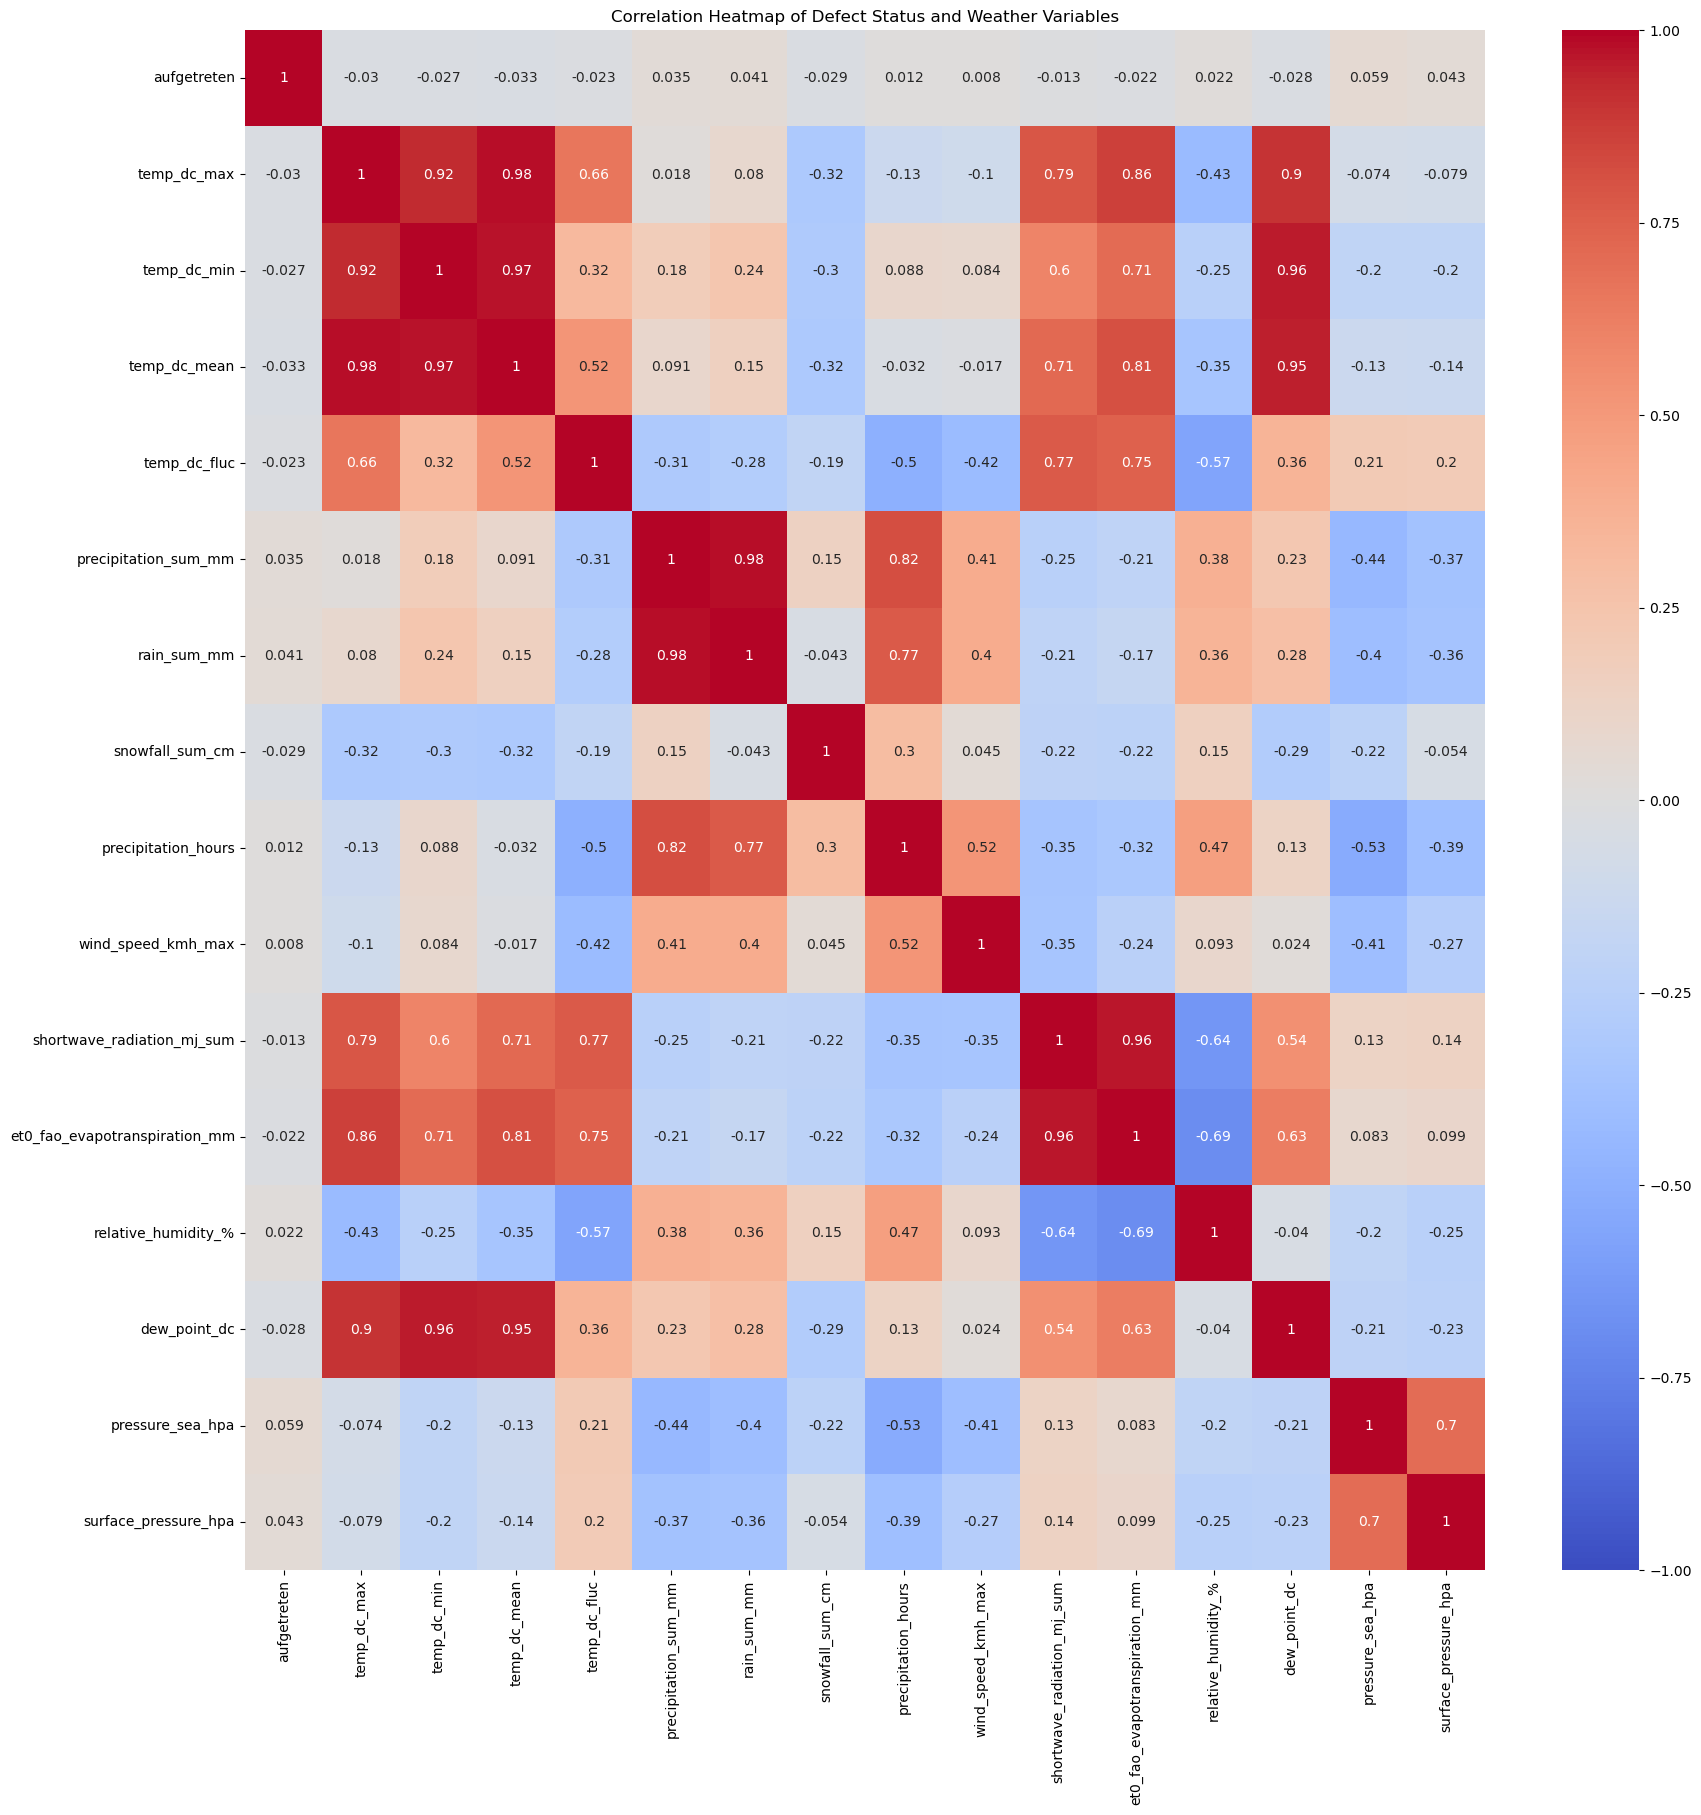

In [81]:
plt.figure(figsize=(20, 20))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Defect Status and Weather Variables')
plt.show()